# **Import Library**

In [1]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00


In [55]:
# library untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Nonaktifkan peringatan terkait perubahan data
pd.options.mode.chained_assignment = None

# library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata

# library untuk pemrosesan teks (NLP)
import nltk
from nltk.tokenize import word_tokenize  # Tokenisasi teks menjadi kata-kata
from nltk.corpus import stopwords  # Daftar kata umum yang sering diabaikan dalam analisis teks

# Mengunduh dataset yang diperlukan untuk tokenisasi dan stopwords
nltk.download('punkt')
nltk.download('stopwords')

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Stopword remover bahasa Indonesia

# library untuk ekstraksi fitur dari teks
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# library untuk machine learning (klasifikasi dan evaluasi)
from sklearn.model_selection import train_test_split  # Membagi dataset menjadi train dan test
from sklearn.preprocessing import LabelEncoder  # Mengonversi label kategori ke numerik

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

# library untuk deep learning (Neural Networks)
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# library untuk word embedding (Word2Vec)
from gensim.models import Word2Vec

# library tambahan untuk manipulasi teks dan data
import re  # Regular expression untuk preprocessing teks
import string  # Modul untuk menangani tanda baca
import csv  # Modul untuk membaca dan menulis file CSV
import requests  # Modul untuk mengambil data dari web
from io import StringIO  # Membantu dalam manipulasi data berbasis string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Loading Dataset**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/dataset/pln_mobile_reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e0c6c8a7-373e-41a1-8e6b-c6d8c897065e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat membantu sekali, cepat. tanggap ketika ...",3,12,5.2.66,2025-02-13 11:37:46,"Hai Kak John , terima kasih sudah memberikan r...",2023-07-03 10:21:25,5.2.66
1,ce75279f-67b5-4206-9ac6-07742d8580a2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mo tambah daya mesti upgrade akun. Giliran isi...,1,5,5.2.66,2025-03-01 02:32:09,"Kak Raras, tks atas antusias Kk melakukan Pena...",2025-03-01 03:05:53,5.2.66
2,16f1da4a-0d91-4066-a5b0-7147f184e78d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi sangat membantu, informasi dan fleksi...",4,2,5.2.66,2025-02-24 07:46:22,NaN,NaN,5.2.66
3,f7ed04ba-e906-4022-9f30-789700d07be3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dilakukan pemeliharaan sistem dong di saat2 te...,1,1,5.2.66,2025-03-01 12:37:11,"Kak Indra, maaf ats ketidaknyamanannya & kekel...",2025-03-01 12:59:38,5.2.66
4,a1147e17-0811-4a45-b022-1dccdf039566,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Meski aplikasi sedikit membantu, kinerja aplik...",1,46,5.2.66,2025-01-14 11:11:01,"Halo Kak, admin cba bantu kendalanya ya. Sbg l...",2025-01-14 11:28:47,5.2.66


In [4]:
# Menghapus baris hanya jika 'content' kosong karena hanya fitur content yang relevan di analisis ini
clean_df = df.dropna(subset=['content'])

# Menghapus duplikat berdasarkan 'reviewId'
clean_df = df.drop_duplicates(subset=['reviewId'], keep='first')

# Melihat jumlah data setelah cleaning
print("Dataframe setelah cleaning:")
print(f"Jumlah ulasan: {clean_df.shape[0]}")
print(f"Jumlah fitur: {clean_df.shape[1]}")

Dataframe setelah cleaning:
Jumlah ulasan: 48292
Jumlah fitur: 11


In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48292 entries, 0 to 48291
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              48292 non-null  object
 1   userName              48292 non-null  object
 2   userImage             48292 non-null  object
 3   content               48292 non-null  object
 4   score                 48292 non-null  int64 
 5   thumbsUpCount         48292 non-null  int64 
 6   reviewCreatedVersion  41735 non-null  object
 7   at                    48292 non-null  object
 8   replyContent          44555 non-null  object
 9   repliedAt             44555 non-null  object
 10  appVersion            41735 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.1+ MB


# **Preprocessing Text**

## Mendefinisikan Fungsi

In [6]:
# URL stopwords dari GitHub
url_stopwords = "https://raw.githubusercontent.com/mrickyrizaldi/Sentiment-Analysis/main/stopword-id.txt"

# Unduh stopwords dari GitHub
response = requests.get(url_stopwords)
if response.status_code == 200:
    custom_stopwords = response.text.splitlines()  # Pisahkan per baris
else:
    print("Gagal mengunduh stopword")
    custom_stopwords = []

# Gabungkan dengan stopwords dari NLTK
stopwords_list = set(stopwords.words('indonesian') + stopwords.words('english'))
stopwords_list.update(custom_stopwords)

# URL slangwords dari GitHub
url_slang = "https://raw.githubusercontent.com/mrickyrizaldi/Sentiment-Analysis/main/kamus_slang.csv"

# Unduh dan baca slangwords
response = requests.get(url_slang)
if response.status_code == 200:
    csv_data = StringIO(response.text)
    slangwords = pd.read_csv(csv_data, encoding="utf-8", header=0).set_index("slang")["formal"].to_dict()
else:
    print("Gagal mengunduh kamus_slang")
    slangwords = {}

In [7]:
def remove_emoji(text):
    """Menghapus emoji dari teks"""
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticon
        "\U0001F300-\U0001F5FF"  # Simbol & Piktogram
        "\U0001F680-\U0001F6FF"  # Transportasi & Simbol lainnya
        "\U0001F700-\U0001F77F"  # Simbol Alkimia
        "\U0001F780-\U0001F7FF"  # Geometri
        "\U0001F800-\U0001F8FF"  # Simbol tambahan
        "\U0001F900-\U0001F9FF"  # Emoji wajah & bagian tubuh
        "\U0001FA00-\U0001FA6F"  # Simbol tambahan lainnya
        "\U0001FA70-\U0001FAFF"  # Simbol tambahan lainnya
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)  # Menghapus emoji

def clean_text(text):
    """Membersihkan teks tanpa menghapus spasi antara kata dan tanpa menambah spasi berlebih"""
    text = remove_emoji(text)  # Hapus emoji
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Menghapus mention (@username)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Menghapus hashtag (#hashtag)
    text = re.sub(r'RT[\s]', '', text)  # Menghapus RT (retweet)
    text = re.sub(r"http\S+", '', text)  # Menghapus URL/link
    text = re.sub(r'[0-9]+', '', text)  # Menghapus angka

    # Menghapus tanda baca, tetapi hanya mengganti dengan spasi jika setelahnya bukan spasi
    text = re.sub(r'([' + re.escape(string.punctuation) + '])(\S)', r' \2', text)  # Jika setelah tanda baca tidak ada spasi, tambahkan satu
    text = re.sub(r'[' + re.escape(string.punctuation) + ']', '', text)  # Hapus tanda baca yang tersisa

    text = text.replace('\n', ' ')  # Mengganti baris baru dengan spasi
    text = re.sub(r'\s+', ' ', text).strip()  # Menghapus spasi berlebih

    return text

def casefold_text(text):
    """Mengubah teks menjadi huruf kecil."""
    return text.lower()

def tokenize_text(text):
    """Memecah teks menjadi token-token kata."""
    return word_tokenize(text)

def filtering_text(tokens):
    """Menghapus stopwords dalam teks menggunakan daftar stopwords bahasa Indonesia dan Inggris."""
    filtered = []
    for word in tokens:
        if word not in stopwords_list:
            filtered.append(word)
    return filtered

def fix_slangwords(tokens):
    """Mengubah kata slang dalam teks menjadi bentuk formal."""
    fixed_words = []

    for word in tokens:
        lower_word = word.lower()
        if lower_word in slangwords:
            fixed_words.append(slangwords[lower_word])
        else:
            fixed_words.append(word)
    return fixed_words

def stemming_Text(tokens):
    """Melakukan stemming teks menggunakan Sastrawi untuk mendapatkan kata dasar."""
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return stemmed_words

def to_sentence(list_words):
    """Mengubah daftar kata menjadi satu kalimat utuh."""
    sentence = ' '.join(word for word in list_words)
    return sentence

## Memanggil Fungsi

In [8]:
processed_df = clean_df.copy()

# Membersihkan teks dari karakter yang tidak diperlukan
processed_df['text_clean'] = processed_df['content'].apply(clean_text)

# Mengubah seluruh teks menjadi huruf kecil
processed_df['text_casefolding'] = processed_df['text_clean'].apply(casefold_text)

# Tokenisasi teks
processed_df['text_tokenizing'] = processed_df['text_casefolding'].apply(tokenize_text)

# Konversi slangwords
processed_df['text_slangwords'] = processed_df['text_tokenizing'].apply(fix_slangwords)

# Stopword removal
processed_df['text_stopword'] = processed_df['text_slangwords'].apply(filtering_text)

# Gabungkan kata menjadi kalimat utuh kembali
processed_df['text_final'] = processed_df['text_stopword'].apply(to_sentence)

In [9]:
processed_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefolding,text_tokenizing,text_slangwords,text_stopword,text_final
0,e0c6c8a7-373e-41a1-8e6b-c6d8c897065e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat membantu sekali, cepat. tanggap ketika ...",3,12,5.2.66,2025-02-13 11:37:46,"Hai Kak John , terima kasih sudah memberikan r...",2023-07-03 10:21:25,5.2.66,Sangat membantu sekali cepat tanggap ketika ad...,sangat membantu sekali cepat tanggap ketika ad...,"[sangat, membantu, sekali, cepat, tanggap, ket...","[sangat, membantu, sekali, cepat, tanggap, ket...","[membantu, cepat, tanggap, pengaduan, update, ...",membantu cepat tanggap pengaduan update aplika...
1,ce75279f-67b5-4206-9ac6-07742d8580a2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mo tambah daya mesti upgrade akun. Giliran isi...,1,5,5.2.66,2025-03-01 02:32:09,"Kak Raras, tks atas antusias Kk melakukan Pena...",2025-03-01 03:05:53,5.2.66,Mo tambah daya mesti upgrade akun Giliran isi ...,mo tambah daya mesti upgrade akun giliran isi ...,"[mo, tambah, daya, mesti, upgrade, akun, gilir...","[mau, tambah, daya, mesti, upgrade, akun, gili...","[daya, upgrade, akun, giliran, isi, data, leng...",daya upgrade akun giliran isi data lengkap plu...
2,16f1da4a-0d91-4066-a5b0-7147f184e78d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi sangat membantu, informasi dan fleksi...",4,2,5.2.66,2025-02-24 07:46:22,NaN,NaN,5.2.66,Aplikasi sangat membantu informasi dan fleksib...,aplikasi sangat membantu informasi dan fleksib...,"[aplikasi, sangat, membantu, informasi, dan, f...","[aplikasi, sangat, membantu, informasi, dan, f...","[aplikasi, membantu, informasi, fleksibel, rec...",aplikasi membantu informasi fleksibel recommen...
3,f7ed04ba-e906-4022-9f30-789700d07be3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dilakukan pemeliharaan sistem dong di saat2 te...,1,1,5.2.66,2025-03-01 12:37:11,"Kak Indra, maaf ats ketidaknyamanannya & kekel...",2025-03-01 12:59:38,5.2.66,Dilakukan pemeliharaan sistem dong di saat ter...,dilakukan pemeliharaan sistem dong di saat ter...,"[dilakukan, pemeliharaan, sistem, dong, di, sa...","[dilakukan, pemeliharaan, sistem, dong, di, sa...","[pemeliharaan, sistem, program, diskon, pembel...",pemeliharaan sistem program diskon pembelian l...
4,a1147e17-0811-4a45-b022-1dccdf039566,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Meski aplikasi sedikit membantu, kinerja aplik...",1,46,5.2.66,2025-01-14 11:11:01,"Halo Kak, admin cba bantu kendalanya ya. Sbg l...",2025-01-14 11:28:47,5.2.66,Meski aplikasi sedikit membantu kinerja aplika...,meski aplikasi sedikit membantu kinerja aplika...,"[meski, aplikasi, sedikit, membantu, kinerja, ...","[meski, aplikasi, sedikit, membantu, kinerja, ...","[aplikasi, membantu, kinerja, aplikasi, lambat...",aplikasi membantu kinerja aplikasi lambat apli...


# **Pelabelan**

## Mendefinisikan Fungsi

In [10]:
def load_lexicon(url):
    """Mengambil lexicon dari CSV dan mengonversinya menjadi dictionary."""
    response = requests.get(url)

    if response.status_code == 200:
        df = pd.read_csv(StringIO(response.text), header=None)  # Membaca CSV tanpa header
        return df.set_index(0)[1].to_dict()  # Konversi ke dictionary
    else:
        print(f"Failed to fetch lexicon from {url}")
        return {}

# URL lexicon
positive_lexicon_url = "https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv"
negative_lexicon_url = "https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv"

# Load lexicon
lexicon_positive = load_lexicon(positive_lexicon_url)
lexicon_negative = load_lexicon(negative_lexicon_url)

# Cek hasil
print("Lexicon Positif :", dict(list(lexicon_positive.items())[:5]))
print("Lexicon Negatif :", dict(list(lexicon_negative.items())[:5]))

Lexicon Positif : {'hai': 3, 'merekam': 2, 'ekstensif': 3, 'paripurna': 1, 'detail': 2}
Lexicon Negatif : {'putus tali gantung': -2, 'gelebah': -2, 'gobar hati': -2, 'tersentuh (perasaan)': -1, 'isak': -5}


In [11]:
# Fungsi untuk menentukan polaritas sentimen dari reviews
def sentiment_analysis_lexicon_indonesia(text):
  '''Fungsi untuk memberi skor dan polaritas sentimen pada text'''
  score = 0  # Inisialisasi skor sentimen ke 0

  for word in text:
      if word in lexicon_positive:
          score += lexicon_positive[word]  # Tambahkan skor positif
      elif word in lexicon_negative:
          score += lexicon_negative[word]  # Kurangkan skor negatif

  polarity='' # Inisialisasi variabel polaritas

  # Menentukan polaritas berdasarkan skor sentimen
  if score > 0:
      polarity = 'positive'
  elif score < 0:
      polarity = 'negative'
  else:
      polarity = 'neutral'

  return score, polarity  # Mengembalikan skor dan polaritas teks

## Memanggil Fungsi

In [12]:
# Menerapkan fungsi sentiment_analysis_lexicon_indonesia ke seluruh kolom 'text_stopword'
results = processed_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)

# Memisahkan skor sentimen dan label polaritas
polarity_scores, polarities = zip(*results)

# Menambahkan hasil ke dalam DataFrame
processed_df['polarity_score'] = polarity_scores
processed_df['polarity'] = polarities

# Menampilkan jumlah masing-masing kategori sentimen
print(processed_df['polarity'].value_counts())

polarity
positive    33252
negative    11241
neutral      3799
Name: count, dtype: int64


In [50]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48292 entries, 0 to 48291
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              48292 non-null  object
 1   userName              48292 non-null  object
 2   userImage             48292 non-null  object
 3   content               48292 non-null  object
 4   score                 48292 non-null  int64 
 5   thumbsUpCount         48292 non-null  int64 
 6   reviewCreatedVersion  41735 non-null  object
 7   at                    48292 non-null  object
 8   replyContent          44555 non-null  object
 9   repliedAt             44555 non-null  object
 10  appVersion            41735 non-null  object
 11  text_clean            48292 non-null  object
 12  text_casefolding      48292 non-null  object
 13  text_tokenizing       48292 non-null  object
 14  text_slangwords       48292 non-null  object
 15  text_stopword         48292 non-null

# **Visualisasi**

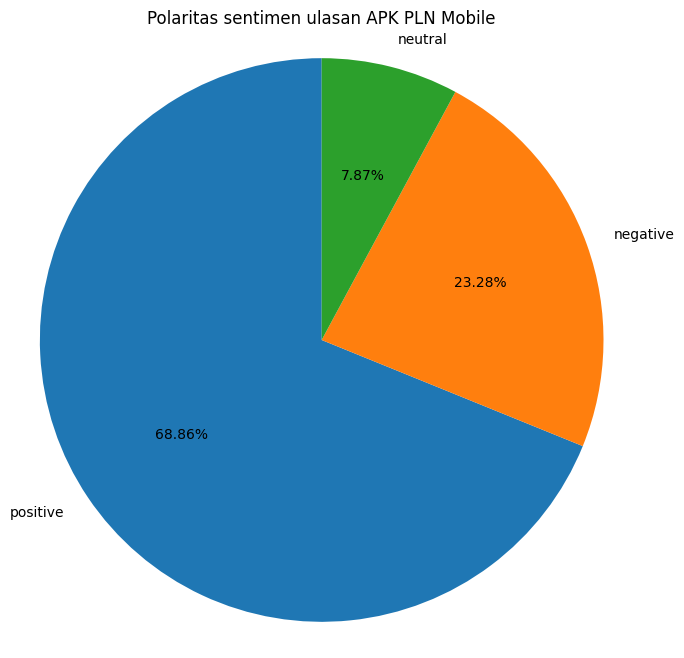

In [13]:
# Pie chart polarity df tanpa stemming
polarity_counts = processed_df['polarity'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Polaritas sentimen ulasan APK PLN Mobile')
plt.axis('equal')
plt.show()

## Word Cloud

In [14]:
# Fungsi untuk membuat WordCloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=500, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

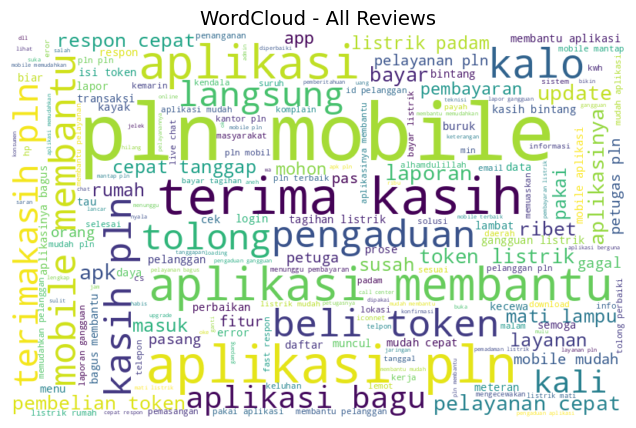

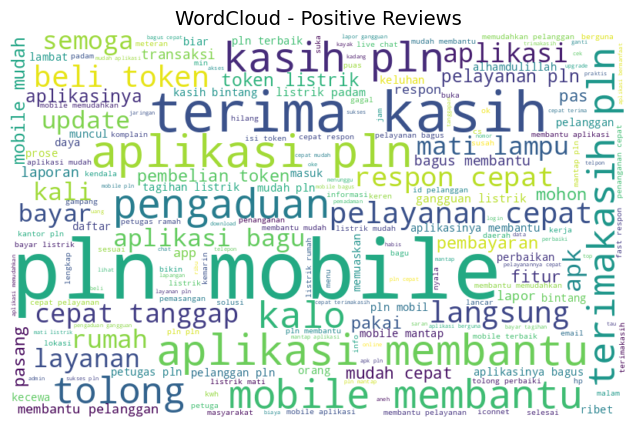

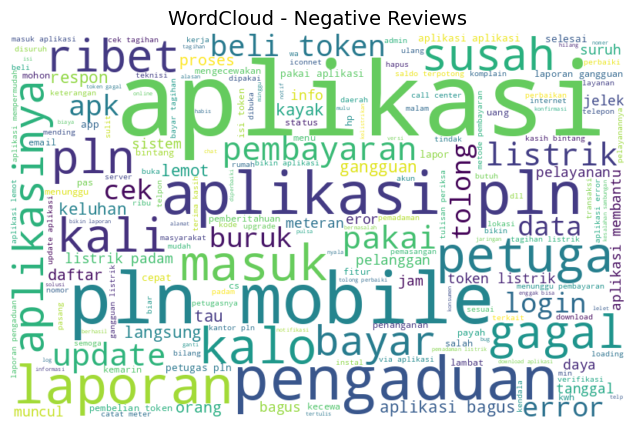

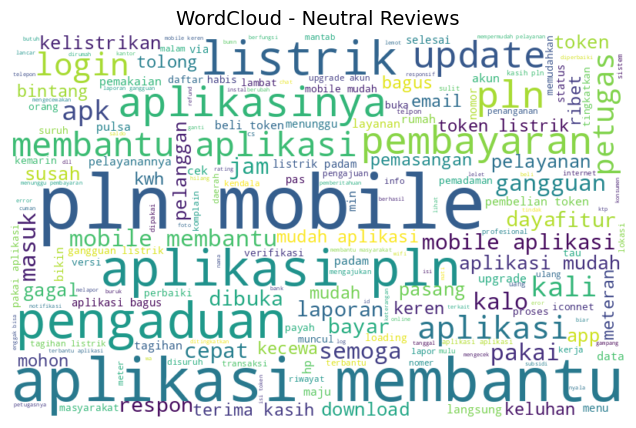

In [15]:
# Gabungkan semua teks dalam satu string untuk tiap kategori pada df tanpa stemming
all_words = ' '.join(processed_df['text_final'])
positive_words = ' '.join(processed_df[processed_df['polarity'] == 'positive']['text_final'])
negative_words = ' '.join(processed_df[processed_df['polarity'] == 'negative']['text_final'])
neutral_words = ' '.join(processed_df[processed_df['polarity'] == 'neutral']['text_final'])

# Tampilkan WordCloud
generate_wordcloud(all_words, "WordCloud - All Reviews")
generate_wordcloud(positive_words, "WordCloud - Positive Reviews")
generate_wordcloud(negative_words, "WordCloud - Negative Reviews")
generate_wordcloud(neutral_words, "WordCloud - Neutral Reviews")

# **Kombinasi Data Splitting dan Ekstraksi Fitur dan Model**

In [17]:
# Fungsi Evaluasi Model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    return {
        'Training Accuracy': accuracy_score(y_train, train_pred),
        'Training Precision': precision_score(y_train, train_pred, average='weighted', zero_division=1),
        'Training Recall': recall_score(y_train, train_pred, average='weighted', zero_division=1),
        'Training F1-Score': f1_score(y_train, train_pred, average='weighted'),

        'Testing Accuracy': accuracy_score(y_test, test_pred),
        'Testing Precision': precision_score(y_test, test_pred, average='weighted', zero_division=1),
        'Testing Recall': recall_score(y_test, test_pred, average='weighted', zero_division=1),
        'Testing F1-Score': f1_score(y_test, test_pred, average='weighted')
    }

In [32]:
# Fungsi untuk Plot Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    labels = ["Negatif", "Netral", "Positif"]
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

## **Pelatihan: Support Vector Machine dan Random Forest, Ekstraksi Fitur: TF-IDF, Pembagian Data: 80/20**

In [76]:
# Pisahkan data menjadi fitur (reviews) dan label (sentimen)
X = processed_df['text_final']
y = processed_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(
    max_features=5000,
    min_df=15,
    max_df=0.7,
)

X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Bagi data menjadi data latih dan data uji
X_train_tfid, X_test_tfid, y_train_tfid, y_test_tfid = train_test_split(
    X_tfidf, y, test_size=0.2, stratify=y, random_state=42
)

# Cek distribusi setelah split
print("Distribusi data latih:")
print(y_train_tfid.value_counts())
print("Distribusi data uji:")
print(y_test_tfid.value_counts())

# Cek ukuran dataset setelah pembagian
print(f"Jumlah fitur setelah TF-IDF: {X_tfidf.shape[1]}")
print(f"Data latih: {X_train_tfid.shape} | Data uji: {X_test_tfid.shape}")

Distribusi data latih:
polarity
positive    26601
negative     8993
neutral      3039
Name: count, dtype: int64
Distribusi data uji:
polarity
positive    6651
negative    2248
neutral      760
Name: count, dtype: int64
Jumlah fitur setelah TF-IDF: 1969
Data latih: (38633, 1969) | Data uji: (9659, 1969)


In [77]:
# Inisialisasi Model SVM
svm_model = SVC(kernel='linear', random_state=0)

# Latih Model dengan Data Latih
svm_model.fit(X_train_tfid, y_train_tfid)

# Evaluasi Model
svm_results = evaluate_model(svm_model, X_train_tfid, y_train_tfid, X_test_tfid, y_test_tfid)

In [78]:
# Inisialisasi Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih Model dengan Data Latih
rf_model.fit(X_train_tfid, y_train_tfid)

# Evaluasi Model
rf_results = evaluate_model(rf_model, X_train_tfid, y_train_tfid, X_test_tfid, y_test_tfid)

In [79]:
# Simpan hasil evaluasi dalam DataFrame
results_df = pd.DataFrame([svm_results, rf_results],
                          index=['Support Vector', 'Random Forest'])

# Tampilkan hasil evaluasi
results_df

,Training Accuracy,Training Precision,Training Recall,Training F1-Score,Testing Accuracy,Testing Precision,Testing Recall,Testing F1-Score
Support Vector,0.951208,0.950308,0.951208,0.948800,0.934155,0.931962,0.934155,0.931189
Random Forest,0.999094,0.999095,0.999094,0.999094,0.874107,0.870930,0.874107,0.868434


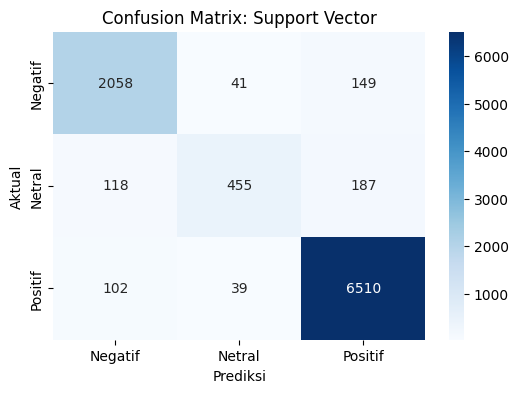

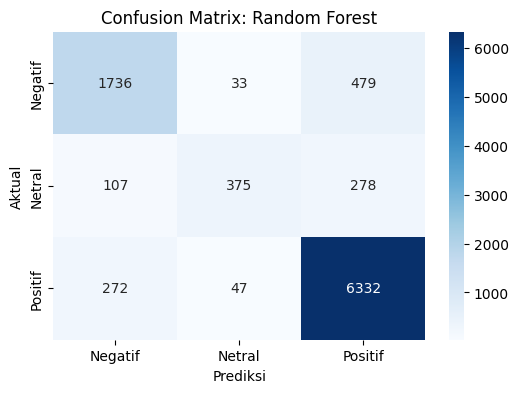

In [80]:
# Prediksi dengan Logistic Regression
svm_test_pred = svm_model.predict(X_test_tfid)
rf_test_pred = rf_model.predict(X_test_tfid)

# Evaluasi Menggunakan Confusion Matrix
svm_cm = confusion_matrix(y_test_tfid, svm_test_pred)
rf_cm = confusion_matrix(y_test_tfid, rf_test_pred)

# Plot confusion matrix untuk Logistic Regression
plot_confusion_matrix(svm_cm, 'Support Vector')
plot_confusion_matrix(rf_cm, 'Random Forest')

### Inference/Testing SV dan RF dengan TF-IDF

In [81]:
# teks baru
new_texts = [
    "Aplikasi ini sangat intuitif dan responsif, benar-benar memudahkan pekerjaan saya! 😊",
    "Fitur-fiturnya cukup standar, tidak ada yang terlalu istimewa masih ada beberapa bug tetapi tetap bisa digunakan.",
    "Sering error saat digunakan, sangat mengganggu pengalaman saya! 😡"
]

# Preprocessing teks baru
processed_texts = []
for text in new_texts:
    text = clean_text(text)                 # Membersihkan teks dari emoji, URL, angka, dll.
    text = casefold_text(text)              # Mengubah menjadi huruf kecil
    tokens = tokenize_text(text)            # Tokenisasi teks
    tokens = filtering_text(tokens)         # Menghapus stopwords
    tokens = fix_slangwords(tokens)         # Mengubah slang menjadi kata baku
    tokens = stemming_Text(tokens)          # Stemming (Bahasa Indonesia)
    cleaned_sentence = to_sentence(tokens)  # Menggabungkan kembali menjadi kalimat
    processed_texts.append(cleaned_sentence)

# Ubah teks menjadi fitur TF-IDF
new_texts_tfidf = tfidf.transform(processed_texts)

# Prediksi menggunakan SVM
svm_predictions = svm_model.predict(new_texts_tfidf)

# Prediksi menggunakan Random Forest
rf_predictions = rf_model.predict(new_texts_tfidf)

# Menampilkan hasil prediksi
print("=== Hasil Inference SVM ===")
for text, pred in zip(new_texts, svm_predictions):
    print(f"Teks: {text} -> Sentimen: {pred}")

print("\n=== Hasil Inference Random Forest ===")
for text, pred in zip(new_texts, rf_predictions):
    print(f"Teks: {text} -> Sentimen: {pred}")

=== Hasil Inference SVM ===
Teks: Aplikasi ini sangat intuitif dan responsif, benar-benar memudahkan pekerjaan saya! 😊 -> Sentimen: positive
Teks: Fitur-fiturnya cukup standar, tidak ada yang terlalu istimewa masih ada beberapa bug tetapi tetap bisa digunakan. -> Sentimen: neutral
Teks: Sering error saat digunakan, sangat mengganggu pengalaman saya! 😡 -> Sentimen: negative

=== Hasil Inference Random Forest ===
Teks: Aplikasi ini sangat intuitif dan responsif, benar-benar memudahkan pekerjaan saya! 😊 -> Sentimen: positive
Teks: Fitur-fiturnya cukup standar, tidak ada yang terlalu istimewa masih ada beberapa bug tetapi tetap bisa digunakan. -> Sentimen: neutral
Teks: Sering error saat digunakan, sangat mengganggu pengalaman saya! 😡 -> Sentimen: negative


## **Pelatihan: Logistic Regression dan Support Vector Machine, Ekstraksi Fitur: Bag-of-words (BoW), Pembagian Data: 80/20**

In [70]:
# Pisahkan data menjadi fitur (reviews) dan label (sentimen)
X = processed_df['text_final']
y = processed_df['polarity']

# Ekstraksi fitur dengan Bag-of-Words (BoW)
bow_vectorizer = CountVectorizer(
    max_features=5000,
    min_df=15,
    max_df=0.8
)

X_bow = bow_vectorizer.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

# Bagi data menjadi data latih dan data uji
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    X_bow, y, test_size=0.2, stratify=y, random_state=42
)

# Cek distribusi setelah split
print("Distribusi data latih:")
print(y_train_bow.value_counts())
print("Distribusi data uji:")
print(y_test_bow.value_counts())

# Cek ukuran dataset setelah pembagian
print(f"Jumlah fitur setelah BoW: {X_bow.shape[1]}")
print(f"Data latih: {X_train_bow.shape} | Data uji: {X_test_bow.shape}")

Distribusi data latih:
polarity
positive    26601
negative     8993
neutral      3039
Name: count, dtype: int64
Distribusi data uji:
polarity
positive    6651
negative    2248
neutral      760
Name: count, dtype: int64
Jumlah fitur setelah BoW: 1969
Data latih: (38633, 1969) | Data uji: (9659, 1969)


In [71]:
# Inisialisasi Model Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=0)

# Latih Model dengan Data Latih
lr_model.fit(X_train_bow, y_train_bow)

# Evaluasi Model
lr_results = evaluate_model(lr_model, X_train_bow, y_train_bow, X_test_bow, y_test_bow)

In [72]:
# Inisialisasi Model SVM
svm_model_bow = SVC(kernel='linear', random_state=0)

# Latih Model dengan Data Latih
svm_model_bow.fit(X_train_bow, y_train_bow)

# Evaluasi Model
svm_bow_results = evaluate_model(svm_model, X_train_bow, y_train_bow, X_test_bow, y_test_bow)

In [73]:
# Simpan hasil evaluasi dalam DataFrame
results_df = pd.DataFrame([lr_results, svm_bow_results],
                          index=['Logistic Regression', 'Support Vector'])

# Tampilkan hasil evaluasi
results_df

,Training Accuracy,Training Precision,Training Recall,Training F1-Score,Testing Accuracy,Testing Precision,Testing Recall,Testing F1-Score
Logistic Regression,0.958999,0.957984,0.958999,0.957344,0.931359,0.927989,0.931359,0.928614
Support Vector,0.877592,0.894849,0.877592,0.872327,0.864272,0.881401,0.864272,0.858082


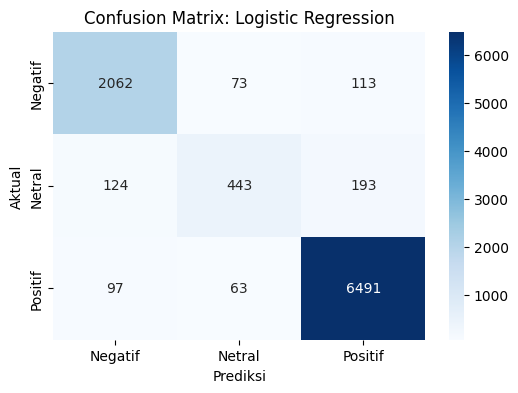

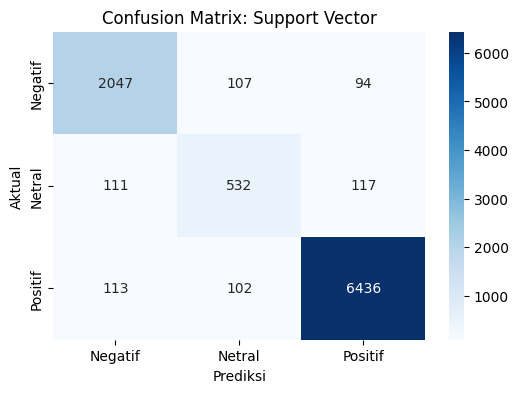

In [74]:
# Prediksi dengan Logistic Regression
lr_test_pred = lr_model.predict(X_test_bow)
svm_test_pred_bow = svm_model_bow.predict(X_test_bow)

# Evaluasi Menggunakan Confusion Matrix
lr_cm = confusion_matrix(y_test_bow, lr_test_pred)
svm_cm = confusion_matrix(y_test_bow, svm_test_pred_bow)

# Plot confusion matrix untuk Logistic Regression
plot_confusion_matrix(lr_cm, 'Logistic Regression')
plot_confusion_matrix(svm_cm, 'Support Vector')

### Inference/Testing LR dan SV dengan BOW

In [82]:
# teks baru
new_texts = [
    "Aplikasi ini sangat intuitif dan responsif, benar-benar memudahkan pekerjaan saya! 😊",
    "Fitur-fiturnya cukup standar, tidak ada yang terlalu istimewa masih ada beberapa bug tetapi tetap bisa digunakan.",
    "Sering error saat digunakan, sangat mengganggu pengalaman saya! 😡"
]

# Preprocessing teks baru
processed_texts = []
for text in new_texts:
    text = clean_text(text)                 # Membersihkan teks dari emoji, URL, angka, dll.
    text = casefold_text(text)              # Mengubah menjadi huruf kecil
    tokens = tokenize_text(text)            # Tokenisasi teks
    tokens = filtering_text(tokens)         # Menghapus stopwords
    tokens = fix_slangwords(tokens)         # Mengubah slang menjadi kata baku
    tokens = stemming_Text(tokens)          # Stemming (Bahasa Indonesia)
    cleaned_sentence = to_sentence(tokens)  # Menggabungkan kembali menjadi kalimat
    processed_texts.append(cleaned_sentence)

# Ubah teks menjadi fitur BoW
new_texts_bow = bow_vectorizer.transform(processed_texts)

# Prediksi menggunakan Logistic Regression
lr_predictions = lr_model.predict(new_texts_bow)

# Prediksi menggunakan SVM
svm_predictions = svm_model_bow.predict(new_texts_bow)

# Menampilkan hasil prediksi
print("Hasil Inference Logistic Regression:")
for text, pred in zip(new_texts, lr_predictions):
    print(f"Teks: {text} -> Sentimen: {pred}")

print("\nHasil Inference SVM :")
for text, pred in zip(new_texts, svm_predictions):
    print(f"Teks: {text} -> Sentimen: {pred}")

Hasil Inference Logistic Regression:
Teks: Aplikasi ini sangat intuitif dan responsif, benar-benar memudahkan pekerjaan saya! 😊 -> Sentimen: positive
Teks: Fitur-fiturnya cukup standar, tidak ada yang terlalu istimewa masih ada beberapa bug tetapi tetap bisa digunakan. -> Sentimen: neutral
Teks: Sering error saat digunakan, sangat mengganggu pengalaman saya! 😡 -> Sentimen: negative

Hasil Inference SVM :
Teks: Aplikasi ini sangat intuitif dan responsif, benar-benar memudahkan pekerjaan saya! 😊 -> Sentimen: positive
Teks: Fitur-fiturnya cukup standar, tidak ada yang terlalu istimewa masih ada beberapa bug tetapi tetap bisa digunakan. -> Sentimen: neutral
Teks: Sering error saat digunakan, sangat mengganggu pengalaman saya! 😡 -> Sentimen: negative


## **Pelatihan: Gated Recurrent Unit (GRU), Ekstraksi Fitur: Word2Vec, Pembagian Data: 80/20**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - accuracy: 0.7383 - loss: 0.6190 - val_accuracy: 0.7885 - val_loss: 0.5127
Epoch 2/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.7904 - loss: 0.4979 - val_accuracy: 0.8221 - val_loss: 0.4582
Epoch 3/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.8223 - loss: 0.4429 - val_accuracy: 0.8342 - val_loss: 0.4239
Epoch 4/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.8463 - loss: 0.3956 - val_accuracy: 0.8401 - val_loss: 0.4019
Epoch 5/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.8590 - loss: 0.3688 - val_accuracy: 0.8518 - val_loss: 0.3861
Epoch 6/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.8659 - loss: 0.3480 - val_accuracy: 0.8565 - val_loss: 0.3747
Epoch 7/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.8762 - loss: 0.3279 - val_accuracy: 0.8513 - val_loss: 0.3874
Epoch 8/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.8848 - loss: 0.3060 - val_accu

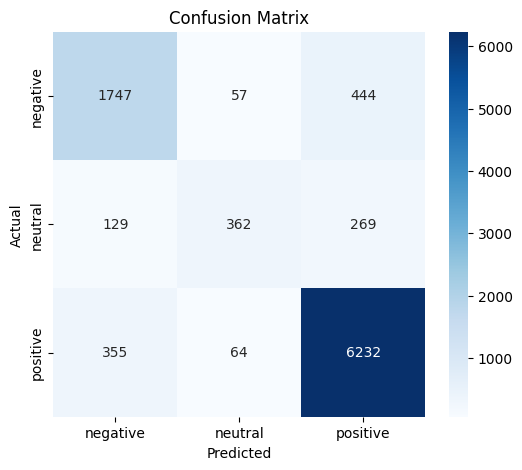

              precision    recall  f1-score   support

    negative       0.78      0.78      0.78      2248
     neutral       0.75      0.48      0.58       760
    positive       0.90      0.94      0.92      6651

    accuracy                           0.86      9659
   macro avg       0.81      0.73      0.76      9659
weighted avg       0.86      0.86      0.86      9659



In [52]:
# Ubah label dalam format kategori menggunakan LabelEncoder
label_encoder = LabelEncoder()
processed_df['label_encoded'] = label_encoder.fit_transform(processed_df['polarity'])  # Mengonversi kategori ke angka

# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(
    processed_df['text_final'],
    processed_df['label_encoded'],
    test_size=0.2,
    stratify=processed_df['label_encoded'],
    random_state=42
)

# Tokenisasi teks menggunakan Tokenizer dari Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # Fit tokenizer hanya pada data latih
X_train_seq = tokenizer.texts_to_sequences(X_train)  # Ubah teks menjadi urutan indeks
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding agar semua urutan memiliki panjang yang sama
max_length = max(len(seq) for seq in X_train_seq)  # Panjang maksimal dalam data latih
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Training Word2Vec untuk membuat embedding dari teks
sentences = [text.split() for text in X_train]  # Tokenisasi
w2v_model = Word2Vec(sentences, vector_size=200, window=5, min_count=10, workers=4)

# Membuat embedding matrix berdasarkan hasil Word2Vec
vocab_size = len(tokenizer.word_index) + 1  # Tambahkan 1 untuk token padding
embedding_matrix = np.zeros((vocab_size, 200))  # Inisialisasi matriks embedding
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# Membangun model GRU, arsitektur bidirectional
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=200, weights=[embedding_matrix],
              input_length=max_length, trainable=False),  # Gunakan embedding dari Word2Vec
    Bidirectional(GRU(256, return_sequences=False)),  # GRU bidirectional dengan 256 unit
    Dropout(0.2),  # Dropout untuk mengurangi overfitting
    Dense(3, activation='softmax')  # softmax untuk klasifikasi multi-kelas
])

# Kompilasi model dengan loss sparse categorical crossentropy dan optimizer Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Gunakan early stopping untuk menghentikan pelatihan jika val_loss tidak membaik selama 3 epoch
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Latih model dengan data train dan validasi dengan data test
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=20, batch_size=128,
    callbacks=[early_stopping], verbose=1
)

# Prediksi label untuk data uji
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Confusion matrix untuk evaluasi model
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [54]:
# Cetak laporan metrik precision, recall, dan F1-score
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    negative       0.78      0.78      0.78      2248
     neutral       0.75      0.48      0.58       760
    positive       0.90      0.94      0.92      6651

    accuracy                           0.86      9659
   macro avg       0.81      0.73      0.76      9659
weighted avg       0.86      0.86      0.86      9659



### Inference/Testing Model GRU

In [57]:
# menyimpan model yang sudah dilatih
model_path = "gru_sentimen.h5"
model.save(model_path)  # Simpan model

In [87]:
# Load model untuk inference
model = load_model(model_path)

# teks baru
new_texts = [
    "Aplikasi ini sangat intuitif dan responsif, benar-benar memudahkan pekerjaan saya! 😊",
    "Fitur-fiturnya cukup standar, tidak ada yang terlalu istimewa masih ada beberapa bug tetapi tetap bisa digunakan.",
    "Sering error saat digunakan, sangat mengganggu pengalaman saya! 😡"
]

# Proses pembersihan teks
processed_texts = []
for text in new_texts:
    text = clean_text(text)                 # Membersihkan teks dari emoji, URL, angka, dll.
    text = casefold_text(text)              # Mengubah menjadi huruf kecil
    tokens = tokenize_text(text)            # Tokenisasi teks
    tokens = filtering_text(tokens)         # Menghapus stopwords
    tokens = fix_slangwords(tokens)         # Mengubah slang menjadi kata baku
    tokens = stemming_Text(tokens)          # Stemming (Bahasa Indonesia)
    cleaned_sentence = to_sentence(tokens)  # Menggabungkan kembali menjadi kalimat
    processed_texts.append(cleaned_sentence)

# Konversi teks ke urutan token
new_texts_seq = tokenizer.texts_to_sequences(processed_texts)

# Padding agar panjang sama dengan data training
new_texts_pad = pad_sequences(new_texts_seq, maxlen=max_length, padding='post')

# Melakukan inference/prediksi
predictions = model.predict(new_texts_pad)
predicted_classes = np.argmax(predictions, axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Konversi label numerik ke kategori
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Menampilkan hasil prediksi
for text, label in zip(new_texts, predicted_labels):
    print(f"Teks: {text} -> Sentimen: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
Teks: Aplikasi ini sangat intuitif dan responsif, benar-benar memudahkan pekerjaan saya! 😊 -> Sentimen: positive
Teks: Fitur-fiturnya cukup standar, tidak ada yang terlalu istimewa masih ada beberapa bug tetapi tetap bisa digunakan. -> Sentimen: positive
Teks: Sering error saat digunakan, sangat mengganggu pengalaman saya! 😡 -> Sentimen: negative
